In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <a href="https://networkx.org/documentation/stable/tutorial.html"> Networkx Tutorial</a>

## Greating a Graph 

In [5]:
G1=nx.Graph()
G1.add_node(1)
G1.add_node(2)
G1.add_edge(1,2)

In [6]:
list(G1)

[1, 2]

AttributeError: 'Graph' object has no attribute 'info'

In [62]:
print(G1.nodes())
print(G1.edges())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(1, 2), (1, 5), (3, 5), (3, 6), (3, 8), (4, 6), (5, 6), (6, 7), (6, 10), (7, 10), (7, 9)]


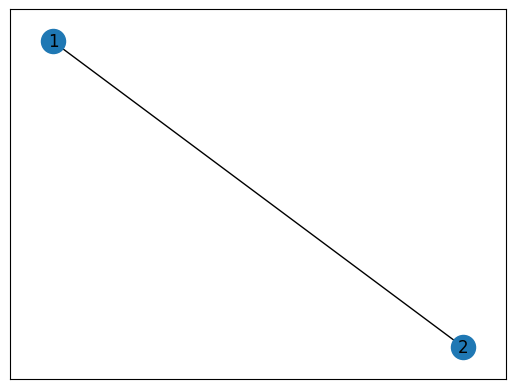

In [10]:
# Draw a network 


nx.draw_networkx(G1)

In [11]:
G1.add_nodes_from(range(3,11))
G1.add_edges_from([(3,5),(3,6),(3,8),(4,6),(5,6),(5,1),(6,7),(6,10),(7,10)])

In [12]:
print(G1.nodes())
print(G1.edges())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(1, 2), (1, 5), (3, 5), (3, 6), (3, 8), (4, 6), (5, 6), (6, 7), (6, 10), (7, 10)]


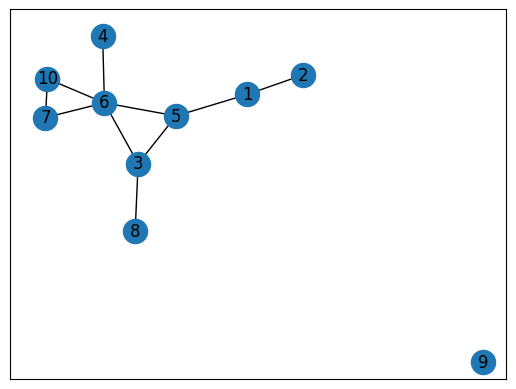

In [15]:
nx.draw_networkx(G1)

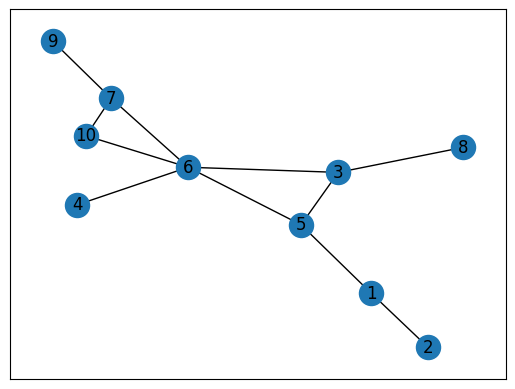

In [16]:
G1.add_edge(7,9)
nx.draw_networkx(G1)

# Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like,
can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated
attribute dictionary (the keys must be hashable).  By default these are empty,
but attributes can be added or changed using `add_edge`, `add_node` or direct
manipulation of the attribute dictionaries named `G.graph`, `G.nodes`, and
`G.edges` for a graph `G`.

## Graph attributes

Assign graph attributes when creating a new graph

In [17]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [18]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [22]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [21]:
list(G.nodes[1])

['time']

In [23]:
G.nodes[1]

{'time': '5pm', 'room': 714}

In [24]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [37]:
list(G.edges)

[(1, 2), (3, 4), (3, 2), (4, 5)]

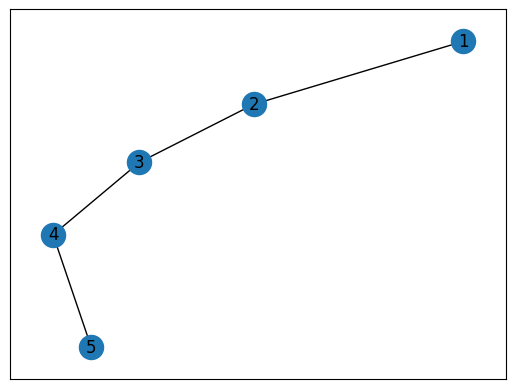

In [25]:
nx.draw_networkx(G)

In [41]:
G.edges[(1,2)]
#G.edges[(1,2)]['weight']

4.7

### Adjacent Matrix 

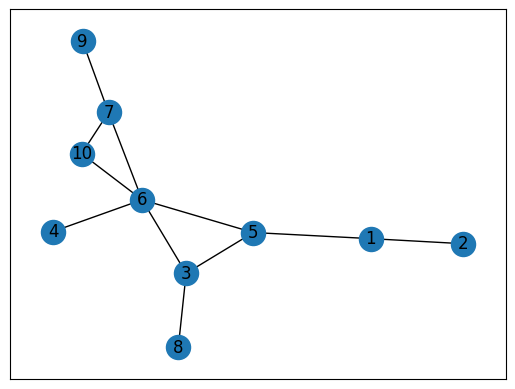

In [26]:
nx.draw_networkx(G1)

In [27]:
A1=nx.adjacency_matrix(G1)

/tmp/ipykernel_58938/1350452008.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1=nx.adjacency_matrix(G1)


In [29]:
print(A1)

  (0, 1)	1
  (0, 4)	1
  (1, 0)	1
  (2, 4)	1
  (2, 5)	1
  (2, 7)	1
  (3, 5)	1
  (4, 0)	1
  (4, 2)	1
  (4, 5)	1
  (5, 2)	1
  (5, 3)	1
  (5, 4)	1
  (5, 6)	1
  (5, 9)	1
  (6, 5)	1
  (6, 8)	1
  (6, 9)	1
  (7, 2)	1
  (8, 6)	1
  (9, 5)	1
  (9, 6)	1


In [30]:
A1=nx.to_numpy_matrix(G1)

In [31]:
A1

matrix([[0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 1., 1., 0., 1., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]])

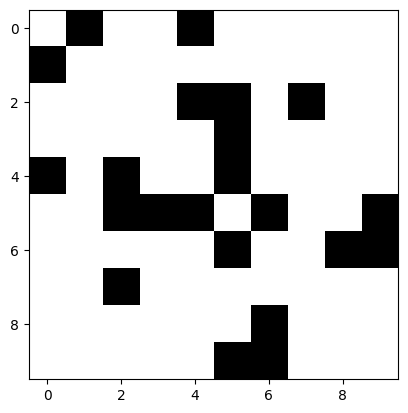

In [32]:
plt.figure(1)
plt.imshow(A1,cmap="Greys")

In [33]:
!cat g_test.txt

0 1 2 3 5
1 3 6
2 
3 4
4 5 7
5 8
6
7
8 9
9


In [34]:
G_test=nx.read_adjlist('g_test.txt',nodetype=int)

In [35]:
G_test.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

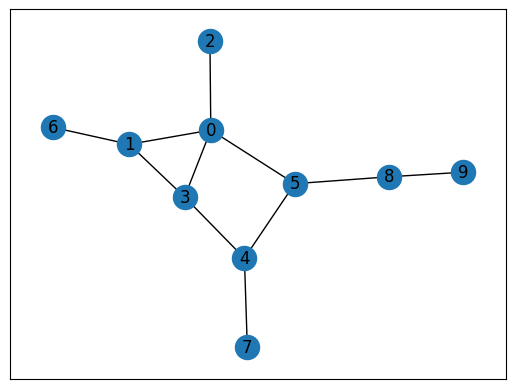

In [36]:
nx.draw_networkx(G_test)

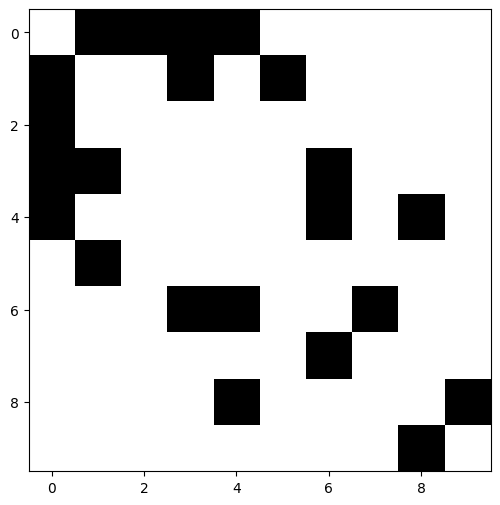

In [37]:
A1=nx.to_numpy_matrix(G_test)
plt.figure(1,figsize=(6,6))
plt.imshow(A1,cmap="Greys")

In [38]:
G_test.degree()

DegreeView({0: 4, 1: 3, 2: 1, 3: 3, 5: 3, 6: 1, 4: 3, 7: 1, 8: 2, 9: 1})

In [41]:
degree=dict(G_test.degree())

In [45]:
degree

{0: 4, 1: 3, 2: 1, 3: 3, 5: 3, 6: 1, 4: 3, 7: 1, 8: 2, 9: 1}

In [40]:
nx.set_node_attributes(G_test, name='deg', values=degree)

NameError: name 'degree' is not defined

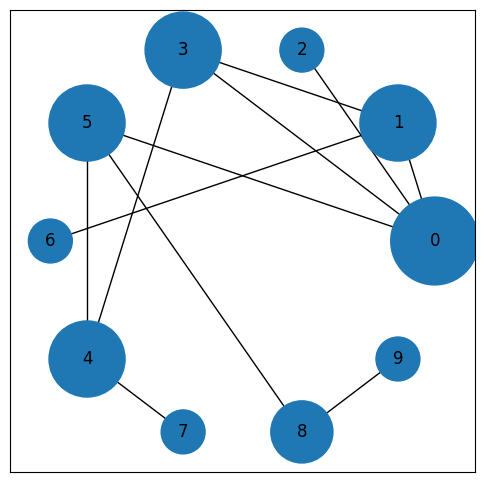

In [43]:
pos=nx.circular_layout(G_test)
plt.figure(2,figsize=(6,6))
nx.draw_networkx(G_test, pos=pos, node_size=[1000*d for d in degree.values()])

## Try it with B_test.txt, Karate_club.txt

In [63]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!cat karate_club.txt


0 1 2 3 4 5 6 7 8 10 11 12 13 17 19 21 31
1 2 3 7 13 17 19 21 30
2 3 7 8 9 13 27 28 32
3 7 12 13
4 6 10
5 6 10 16
6 16
7
8 30 32 33
9 33
10
11
12
13 33
14 32 33
15 32 33
16
17
18 32 33
19 33
20 32 33
21
22 32 33
23 25 27 29 32 33
24 25 27 31
25 31
26 29 33
27 33
28 31 33
29 32 33
30 32 33
31 32 33
32 33
33


In [4]:
K_test=nx.read_adjlist('karate_club.txt',nodetype=int)

In [46]:
K_test.nodes(data=True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 10: {}, 11: {}, 12: {}, 13: {}, 17: {}, 19: {}, 21: {}, 31: {}, 30: {}, 9: {}, 27: {}, 28: {}, 32: {}, 16: {}, 33: {}, 14: {}, 15: {}, 18: {}, 20: {}, 22: {}, 23: {}, 25: {}, 29: {}, 24: {}, 26: {}})

In [5]:
deg=dict(K_test.degree())

In [64]:
deg

{0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 17: 2,
 19: 3,
 21: 2,
 31: 6,
 30: 4,
 9: 2,
 27: 4,
 28: 3,
 32: 12,
 16: 2,
 33: 17,
 14: 2,
 15: 2,
 18: 2,
 20: 2,
 22: 2,
 23: 5,
 25: 3,
 29: 4,
 24: 3,
 26: 2}

In [66]:
nx.set_node_attributes(K_test,deg,'DEG')

In [95]:
K_test.nodes(data=True)

NodeDataView({0: {'DEG': 16}, 1: {'DEG': 9}, 2: {'DEG': 10}, 3: {'DEG': 6}, 4: {'DEG': 3}, 5: {'DEG': 4}, 6: {'DEG': 4}, 7: {'DEG': 4}, 8: {'DEG': 5}, 10: {'DEG': 3}, 11: {'DEG': 1}, 12: {'DEG': 2}, 13: {'DEG': 5}, 17: {'DEG': 2}, 19: {'DEG': 3}, 21: {'DEG': 2}, 31: {'DEG': 6}, 30: {'DEG': 4}, 9: {'DEG': 2}, 27: {'DEG': 4}, 28: {'DEG': 3}, 32: {'DEG': 12}, 16: {'DEG': 2}, 33: {'DEG': 17}, 14: {'DEG': 2}, 15: {'DEG': 2}, 18: {'DEG': 2}, 20: {'DEG': 2}, 22: {'DEG': 2}, 23: {'DEG': 5}, 25: {'DEG': 3}, 29: {'DEG': 4}, 24: {'DEG': 3}, 26: {'DEG': 2}})

In [68]:
K_test.nodes[5]['DEG']

4

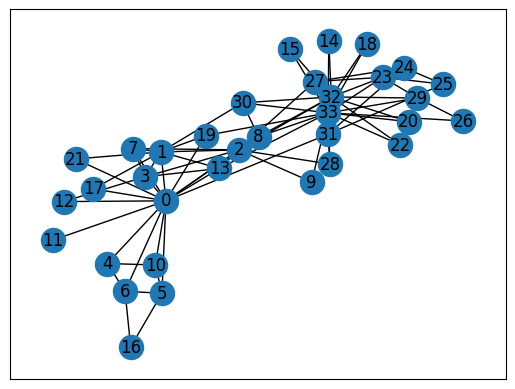

In [69]:
nx.draw_networkx(K_test)

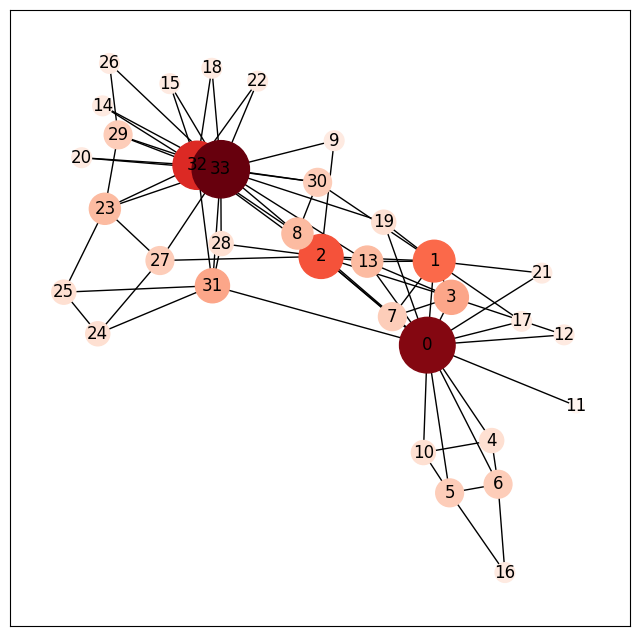

In [6]:
pos=nx.spring_layout(K_test,k=0.5)
plt.figure(4,figsize=(8,8))
nx.draw_networkx(K_test,
                node_size=[100*d for d in deg.values()],
                node_color=list(deg.values()),
                cmap=plt.cm.Reds 
                )

In [74]:
nx.shortest_path(K_test,17,23)
#nx.shortest_path_length(K_test,17,23)


[17, 0, 31, 25, 23]

In [7]:
KP=nx.pagerank(K_test,alpha=0.9)

In [76]:
KP

{0: 0.09923208031303203,
 1: 0.05434031558257919,
 2: 0.059197046841871534,
 3: 0.03661246056285368,
 4: 0.02129205163493875,
 5: 0.028358863602879276,
 6: 0.028358863602879276,
 7: 0.02477713941194104,
 8: 0.030411546757834786,
 10: 0.02129205163493875,
 11: 0.00852322024354681,
 12: 0.01401516915803374,
 13: 0.030254309009995446,
 17: 0.013957441282540166,
 19: 0.01943461088059457,
 21: 0.013957441282540166,
 31: 0.03757266533528673,
 30: 0.024824588072166535,
 9: 0.01374609528355658,
 27: 0.02557998502294416,
 28: 0.019381731951150435,
 32: 0.07330616298815511,
 16: 0.015703158296594022,
 33: 0.10345460652842148,
 14: 0.013916466828162465,
 15: 0.013916466828162465,
 18: 0.013916466828162465,
 20: 0.013916466828162465,
 22: 0.013916466828162465,
 23: 0.03165330491466868,
 25: 0.02041070287756967,
 29: 0.026038055492344045,
 24: 0.020455327268852932,
 26: 0.014276670024478019}

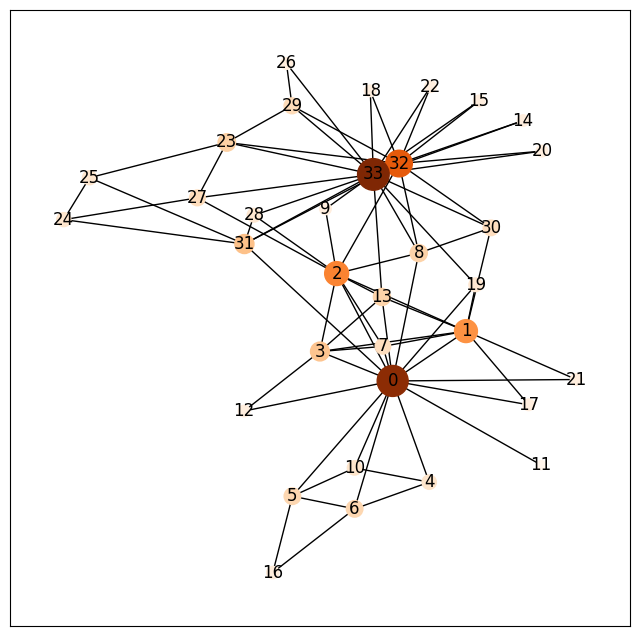

In [8]:
pos=nx.spring_layout(K_test,k=0.5)
plt.figure(4,figsize=(8,8))
nx.draw_networkx(K_test,
                node_size=[5000*d for d in KP.values()],
                node_color=list(KP.values()),
                cmap=plt.cm.Oranges 
                )

Draw a sorted node degree histogram

Text(0.5, 0, 'Node id')

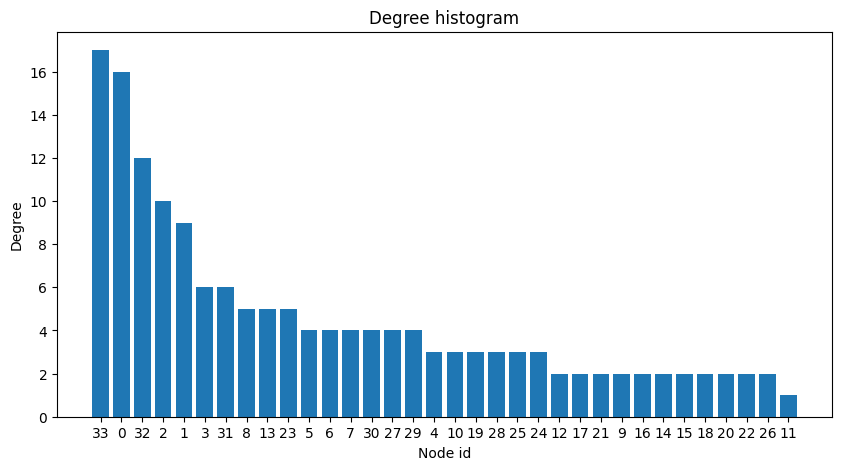

In [71]:
k = dict(K_test.degree())
# sort nodes according to degree
k_sort =sorted(k.items(), key=(lambda x:x[1]), reverse=True)
deg_sort=[x[1] for x in k_sort]
id_sort=[x[0] for x in k_sort]

# show node degrees
plt.figure(1, figsize=(10, 5))
plt.bar(np.arange(34),deg_sort)
plt.xticks(np.arange(34), id_sort)
plt.title('Degree histogram')
plt.ylabel('Degree')
plt.xlabel('Node id')
##plt.savefig('dig_hist.png', format="PNG")

## Construct a network by pandas

In [25]:
#import networkx as nx
#import numpy as np
#import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [26]:
les_nodes = pd.read_csv('les_miserable_node.csv')
les_edges = pd.read_csv('les_miserable_edge.csv')

In [79]:
les_nodes[1:15]

,Id,Label,modularity_class
1,48,Gavroche,8
2,55,Marius,6
3,27,Javert,7
4,25,Thenardier,7
5,23,Fantine,2
6,58,Enjolras,8
7,62,Courfeyrac,8
8,64,Bossuet,8
9,63,Bahorel,8
10,65,Joly,8


In [80]:
max(les_nodes['Id'])

76

In [106]:
les_edges[1:15]

,Source,Target,Weight
1,2,0,8
2,3,0,10
3,3,2,6
4,4,0,1
5,5,0,1
6,6,0,1
7,7,0,1
8,8,0,2
9,9,0,1
10,11,0,5


In [108]:
len(les_edges)

254

In [27]:
G = nx.Graph()
for idx,row in les_nodes.iterrows():
    G.add_node(row['Id'],Label=row['Label'],modularity_class=row['modularity_class'])
for idx,row in les_edges.iterrows():
    G.add_edge(row['Source'],row['Target'],Weight=int(row['Weight']))

In [28]:
G.nodes()

NodeView((11, 48, 55, 27, 25, 23, 58, 62, 64, 63, 65, 24, 26, 41, 57, 59, 61, 0, 66, 68, 69, 70, 16, 60, 71, 29, 17, 18, 19, 20, 21, 22, 49, 51, 75, 76, 34, 35, 36, 37, 38, 28, 31, 54, 2, 3, 39, 42, 43, 72, 12, 30, 33, 44, 47, 50, 52, 56, 73, 74, 1, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 32, 40, 45, 46, 53, 67))

In [83]:
G.nodes[1]['Label']

'Napoleon'

In [85]:
G.edges[25,27]

{'Weight': 5}

In [53]:
print(nx.info(G))

Graph with 77 nodes and 254 edges


/tmp/ipykernel_58938/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [58]:
A=nx.to_numpy_matrix(G)

In [59]:
A

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

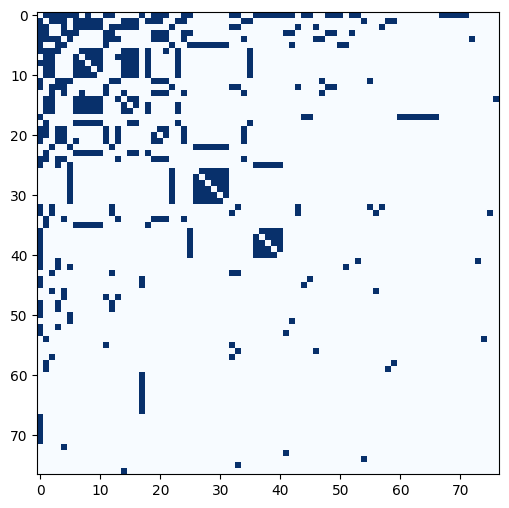

In [55]:
plt.figure(1, figsize=(6, 6))
plt.imshow(A,
          cmap='Blues')

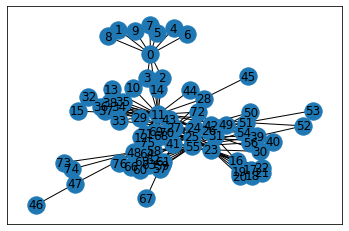

In [113]:
nx.draw_networkx(G)

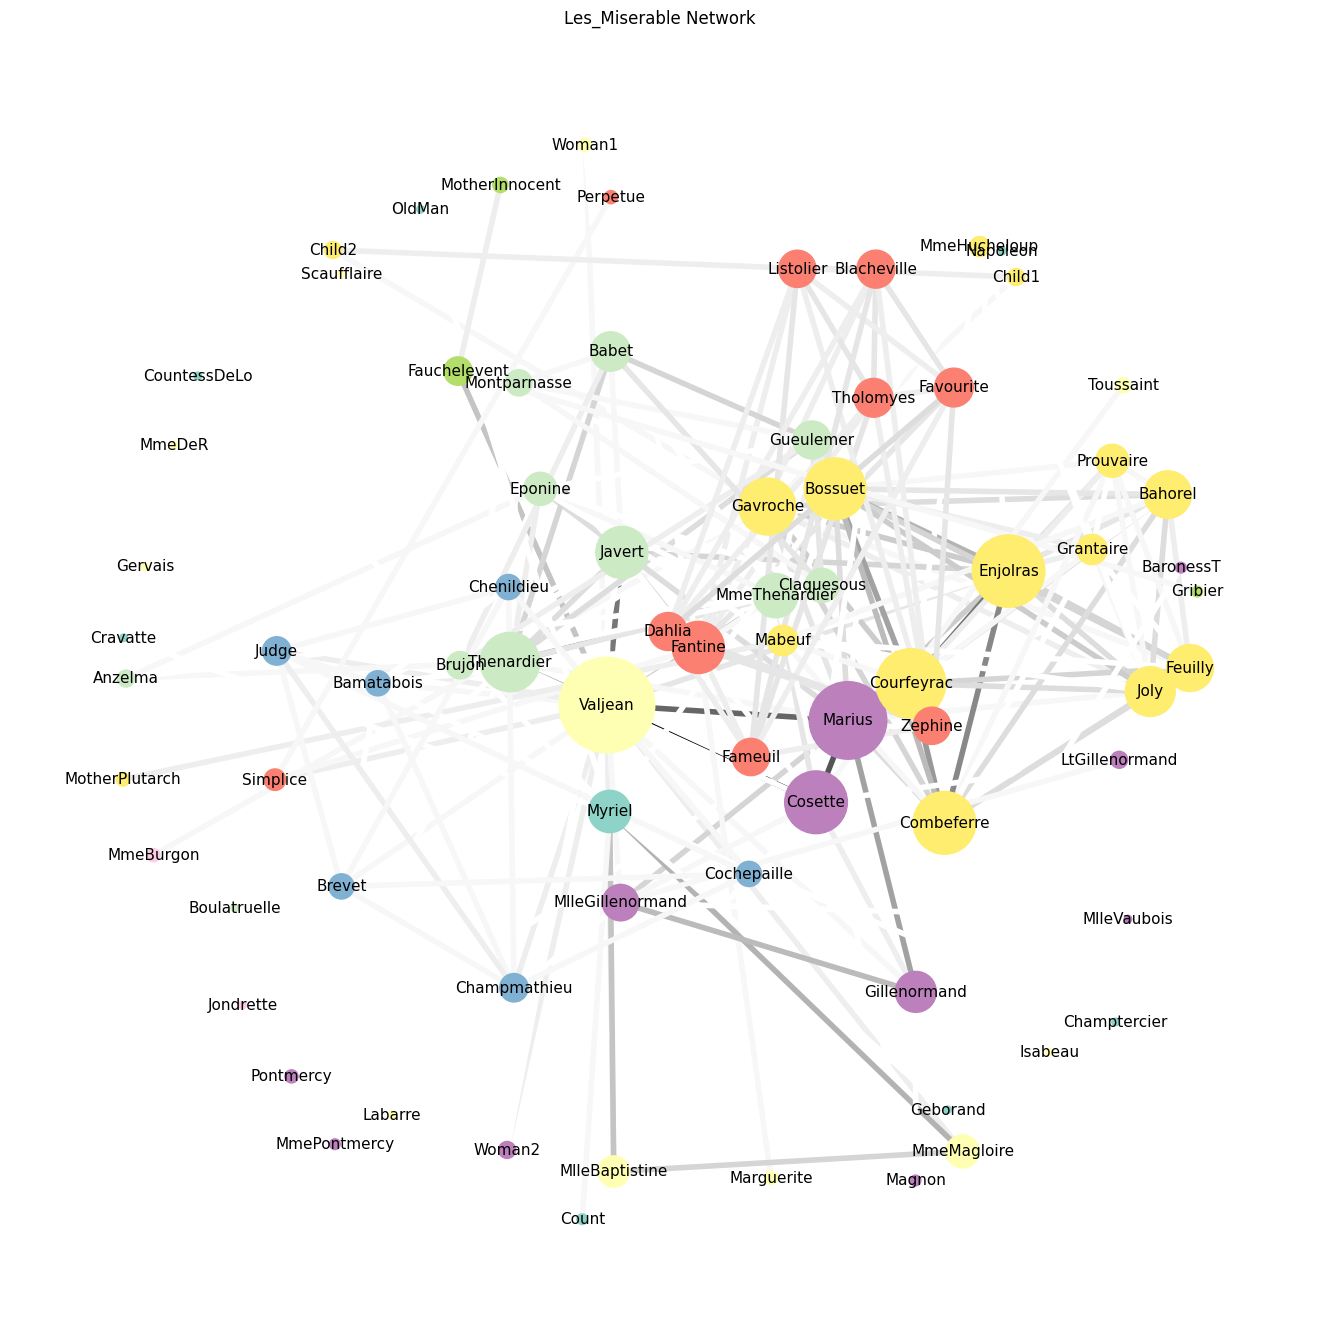

In [86]:
dig = dict(nx.degree(G,weight='Weight')) # degree of network
modul = nx.get_node_attributes(G,'modularity_class')
weight = nx.get_edge_attributes(G,'Weight')

pos=nx.spring_layout(G,iterations=100,k=2) # positions for all nodes
# k = Optimal distance between nodes (default = 1/sqrt(n)), 
# iterations = Number of iterations of spring-force relaxation

plt.figure(figsize=(13,13)) #Control figure size
nx.draw(G,pos
        ,labels=nx.get_node_attributes(G,'Label') # Give label using attributes
        ,node_size = [d*30 for d in dig.values()] # node size
        ,node_color=list(modul.values()) # data for node color
        ,font_size=11 # labelsize
        ,cmap=plt.cm.Set3 # color_map for node
        ,edge_color=list(weight.values()) # data for edge color
        ,width=4 # edge width
        ,edge_cmap=plt.cm.gist_yarg # color_map for edge
       )
plt.title('Les_Miserable Network');
plt.savefig('Les_Miserable.png', format="PNG") # Save figure

 ## BC and Closeness Centrality

In [9]:
BC=nx.betweenness_centrality(K_test, k=None, normalized=True, weight=None, endpoints=False, seed=None)


In [10]:
BC

{0: 0.4376352813852815,
 1: 0.05393668831168831,
 2: 0.14365680615680615,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182782,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.045863395863395856,
 17: 0.0,
 19: 0.03247504810004811,
 21: 0.0,
 31: 0.13827561327561327,
 30: 0.014411976911976905,
 9: 0.0008477633477633478,
 27: 0.022333453583453587,
 28: 0.0017947330447330447,
 32: 0.14524711399711404,
 16: 0.0,
 33: 0.30407497594997596,
 14: 0.0,
 15: 0.0,
 18: 0.0,
 20: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 25: 0.0038404882154882162,
 29: 0.0029220779220779218,
 24: 0.0022095959595959595,
 26: 0.0}

In [12]:
nx.betweenness_centrality(K_test, k=20,endpoints=True)

{0: 0.5330796055796055,
 1: 0.08145743145743144,
 2: 0.15610149110149107,
 3: 0.04486411736411735,
 4: 0.0797979797979798,
 5: 0.06843434343434343,
 6: 0.11641414141414139,
 7: 0.07878787878787878,
 8: 0.09679052429052429,
 10: 0.07929292929292928,
 11: 0.07878787878787878,
 12: 0.07878787878787878,
 13: 0.11947450697450698,
 17: 0.07878787878787878,
 19: 0.0628884078884079,
 21: 0.030303030303030297,
 31: 0.2072486772486772,
 30: 0.08829725829725829,
 9: 0.030829725829725825,
 27: 0.050930735930735924,
 28: 0.07956709956709955,
 32: 0.21777296777296776,
 16: 0.07878787878787878,
 33: 0.3270214045214045,
 14: 0.07878787878787878,
 15: 0.07878787878787878,
 18: 0.07878787878787878,
 20: 0.07878787878787878,
 22: 0.030303030303030297,
 23: 0.049696969696969684,
 25: 0.0810858585858586,
 29: 0.034004329004329,
 24: 0.07979797979797978,
 26: 0.07878787878787878}

In [132]:
BC[24]

0.0022095959595959595

In [133]:
BC.items()

dict_items([(0, 0.4376352813852815), (1, 0.05393668831168831), (2, 0.14365680615680615), (3, 0.011909271284271283), (4, 0.0006313131313131313), (5, 0.02998737373737374), (6, 0.029987373737373736), (7, 0.0), (8, 0.05592682780182782), (10, 0.0006313131313131313), (11, 0.0), (12, 0.0), (13, 0.045863395863395856), (17, 0.0), (19, 0.03247504810004811), (21, 0.0), (31, 0.13827561327561327), (30, 0.014411976911976905), (9, 0.0008477633477633478), (27, 0.022333453583453587), (28, 0.0017947330447330447), (32, 0.14524711399711404), (16, 0.0), (33, 0.30407497594997596), (14, 0.0), (15, 0.0), (18, 0.0), (20, 0.0), (22, 0.0), (23, 0.017613636363636363), (25, 0.0038404882154882162), (29, 0.0029220779220779218), (24, 0.0022095959595959595), (26, 0.0)])

In [17]:
BC_sort =sorted(BC.items(), key=(lambda x:x[1]), reverse=True)

In [18]:
BC_sort

[(0, 0.4376352813852815),
 (33, 0.30407497594997596),
 (32, 0.14524711399711404),
 (2, 0.14365680615680615),
 (31, 0.13827561327561327),
 (8, 0.05592682780182782),
 (1, 0.05393668831168831),
 (13, 0.045863395863395856),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374),
 (6, 0.029987373737373736),
 (27, 0.022333453583453587),
 (23, 0.017613636363636363),
 (30, 0.014411976911976905),
 (3, 0.011909271284271283),
 (25, 0.0038404882154882162),
 (29, 0.0029220779220779218),
 (24, 0.0022095959595959595),
 (28, 0.0017947330447330447),
 (9, 0.0008477633477633478),
 (4, 0.0006313131313131313),
 (10, 0.0006313131313131313),
 (7, 0.0),
 (11, 0.0),
 (12, 0.0),
 (17, 0.0),
 (21, 0.0),
 (16, 0.0),
 (14, 0.0),
 (15, 0.0),
 (18, 0.0),
 (20, 0.0),
 (22, 0.0),
 (26, 0.0)]

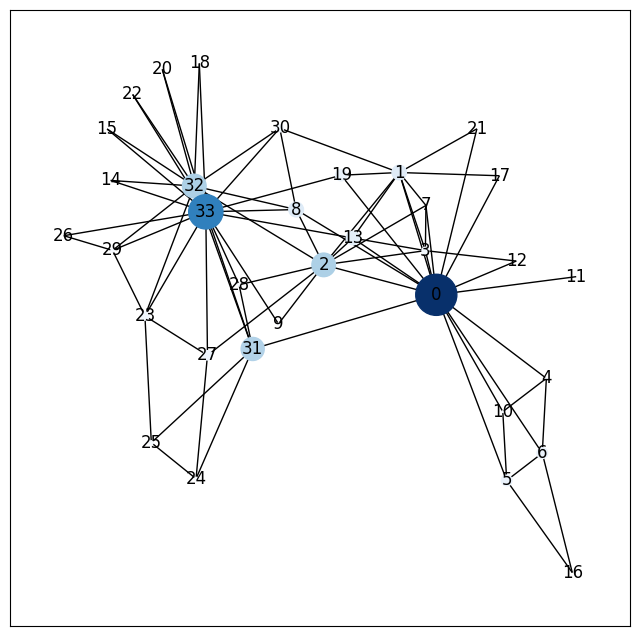

In [20]:
#pos=nx.spring_layout(K_test,k=0.5)
#pos=nx.spectral_layout(K_test)
pos=nx.kamada_kawai_layout(K_test),
plt.figure(4,figsize=(8,8))
nx.draw_networkx(K_test,
                node_size=[2000*d for d in BC.values()],
                node_color=list(BC.values()),
                cmap=plt.cm.Blues 
                )

In [21]:
CC=nx.closeness_centrality(K_test)

In [23]:
CC

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 17: 0.375,
 19: 0.5,
 21: 0.375,
 31: 0.5409836065573771,
 30: 0.4583333333333333,
 9: 0.4342105263157895,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 32: 0.515625,
 16: 0.28448275862068967,
 33: 0.55,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 18: 0.3707865168539326,
 20: 0.3707865168539326,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 25: 0.375,
 29: 0.38372093023255816,
 24: 0.375,
 26: 0.3626373626373626}

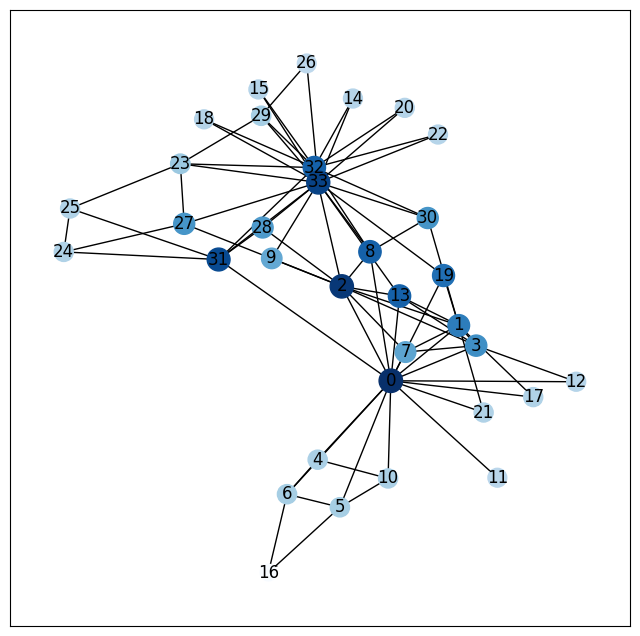

In [22]:
pos=nx.spring_layout(K_test,k=0.5)
#pos=nx.spectral_layout(K_test)
#pos=nx.kamada_kawai_layout(K_test),
plt.figure(4,figsize=(8,8))
nx.draw_networkx(K_test,
                node_size=[500*d for d in CC.values()],
                node_color=list(CC.values()),
                cmap=plt.cm.Blues 
                )

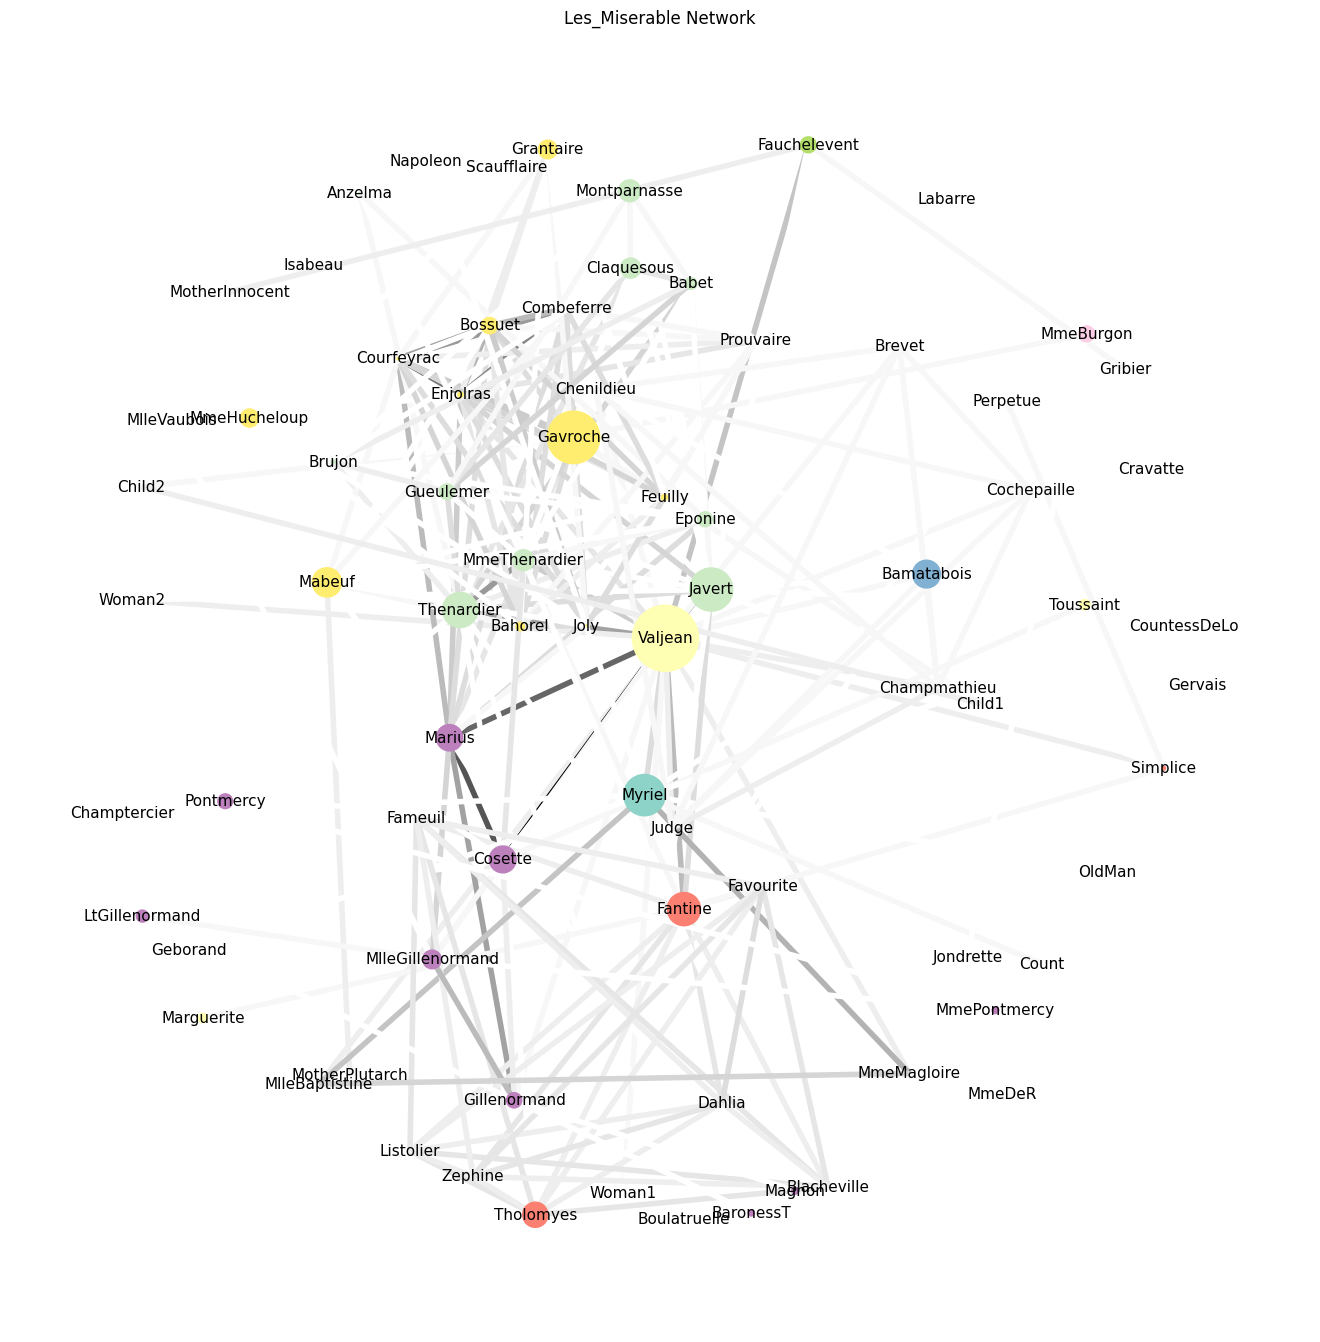

In [40]:
dig = dict(nx.betweenness_centrality(G,weight='Weight')) # degree of network
#dig = dict(nx.closeness_centrality(G))
#modul = nx.get_node_attributes(G,'modularity_class')
weight = nx.get_edge_attributes(G,'Weight')

pos=nx.spring_layout(G,iterations=100,k=2) # positions for all nodes
# k = Optimal distance between nodes (default = 1/sqrt(n)), 
# iterations = Number of iterations of spring-force relaxation

plt.figure(figsize=(13,13)) #Control figure size
nx.draw(G,pos
        ,labels=nx.get_node_attributes(G,'Label') # Give label using attributes
        ,node_size = [d*5000 for d in dig.values()] # node size
        ,node_color=list(modul.values()) # data for node color
        ,font_size=11 # labelsize
        ,cmap=plt.cm.Set3 # color_map for node
        ,edge_color=list(weight.values()) # data for edge color
        ,width=4 # edge width
        ,edge_cmap=plt.cm.gist_yarg # color_map for edge
       )
plt.title('Les_Miserable Network');
plt.savefig('Les_Miserable.png', format="PNG") # Save figure

In [37]:
dig_sort =sorted(dig.items(), key=(lambda x:x[1]), reverse=True)

In [31]:
dig_sort

[(11, 0.45389967342598925),
 (48, 0.2851526100605045),
 (27, 0.1934002556897292),
 (0, 0.17684210526315788),
 (25, 0.12877394243183707),
 (23, 0.11438124351282254),
 (57, 0.08878351180982756),
 (29, 0.0798170426065163),
 (26, 0.07468703323966483),
 (55, 0.07211183261183263),
 (16, 0.06582289055973276),
 (71, 0.049772632338421774),
 (24, 0.04556182121971596),
 (70, 0.0423258968127389),
 (66, 0.036115288220551406),
 (51, 0.0360983519404572),
 (76, 0.03405597326649961),
 (64, 0.02774958228905597),
 (28, 0.02631578947368421),
 (47, 0.02631578947368421),
 (68, 0.025397059568112192),
 (49, 0.024195906432748535),
 (41, 0.023228234728234744),
 (39, 0.022566226171489335),
 (54, 0.015092105263157895),
 (69, 0.014609117490696424),
 (72, 0.011411306042884994),
 (12, 0.00900167084377611),
 (63, 0.007426482873851292),
 (50, 0.004871345029239765),
 (52, 0.004736842105263157),
 (56, 0.003850668337510443),
 (61, 0.0038358395989974933),
 (58, 0.002760803523961418),
 (75, 0.0016466418571681727),
 (31, 0.

In [32]:
G.nodes[11]['Label']

'Valjean'

In [171]:
dig_sort

[(11, 0.45389967342598925),
 (48, 0.2851526100605045),
 (27, 0.1934002556897292),
 (0, 0.17684210526315788),
 (25, 0.12877394243183707),
 (23, 0.11438124351282254),
 (57, 0.08878351180982756),
 (29, 0.0798170426065163),
 (26, 0.07468703323966483),
 (55, 0.07211183261183263),
 (16, 0.06582289055973276),
 (71, 0.049772632338421774),
 (24, 0.04556182121971596),
 (70, 0.0423258968127389),
 (66, 0.036115288220551406),
 (51, 0.0360983519404572),
 (76, 0.03405597326649961),
 (64, 0.02774958228905597),
 (28, 0.02631578947368421),
 (47, 0.02631578947368421),
 (68, 0.025397059568112192),
 (49, 0.024195906432748535),
 (41, 0.023228234728234744),
 (39, 0.022566226171489335),
 (54, 0.015092105263157895),
 (69, 0.014609117490696424),
 (72, 0.011411306042884994),
 (12, 0.00900167084377611),
 (63, 0.007426482873851292),
 (50, 0.004871345029239765),
 (52, 0.004736842105263157),
 (56, 0.003850668337510443),
 (61, 0.0038358395989974933),
 (58, 0.002760803523961418),
 (75, 0.0016466418571681727),
 (31, 0.

In [41]:
df_airports = pd.read_csv('airports.csv')
df_routes = pd.read_csv('routes.csv')

In [44]:
display(df_airports)

,id,name,city,country,icao,lat,lon,alt,timezone,dst,tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,AYMD,-5.207080,145.789002,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7179,12053,Rugao Air Base,Rugao,China,ZSRG,32.257885,120.501656,0,NaN,NaN,NaN,airport,OurAirports
7180,12054,Wuhu Air Base,Wuhu,China,ZSWU,31.390600,118.408997,0,NaN,NaN,NaN,airport,OurAirports
7181,12055,Shanshan Airport,Shanshan,China,ZWSS,42.911701,90.247498,0,NaN,NaN,NaN,airport,OurAirports
7182,12056,Yingkou Lanqi Airport,Yingkou,China,ZYYK,40.542524,122.358600,0,NaN,NaN,NaN,airport,OurAirports


In [43]:
display(df_routes)

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734
